In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import netCDF4 as nc
import xarray as xr
import scipy.ndimage
import scipy as sp
import alphashape
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')


In [2]:
df = pd.read_table("/Users/clara.henry/Documents/Derwael/Data/DataFromInka/smb_DW.txt", delimiter="   ")
dfGL = pd.read_csv("/Users/clara.henry/Documents/Derwael/Data/GroundingLine.csv")


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_3083/762195610.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_table("/Users/clara.henry/Documents/Derwael/Data/DataFromInka/smb_DW.txt", delimiter="   ")


/Users/clara.henry/opt/anaconda3/lib/python3.9/site-packages/shapely/ops.py:42: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  source = iter(source)
/Users/clara.henry/opt/anaconda3/lib/python3.9/site-packages/alphashape/optimizealpha.py:41: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return all([polygon.intersects(point) for point in points])


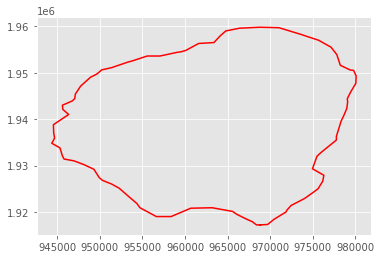

In [3]:
dfGL["Points:0"]

points = np.column_stack((list(dfGL["Points:0"])[::10], list(dfGL["Points:1"])[::10]))

# [list(dfGL["Points:0"]), list(dfGL["Points:1"])]
alpha = 0.95 * alphashape.optimizealpha(points)
hull = alphashape.alphashape(points, alpha)
hull_pts = hull.exterior.coords.xy

fig, ax = plt.subplots()
ax.plot(hull_pts[0], hull_pts[1], color='red')


In [4]:
len(list(dfGL["Points:1"]))/50

127.24

In [5]:
x = np.linspace(919606.468, 998606.468, 178)
y = np.linspace(1878711.6838, 1967211.6838, 159)
grid_x, grid_y = np.mgrid[919606.468:998606.468:178j, 1878711.6838:1967211.6838:159j]
smb_new = scipy.interpolate.griddata((df["X"], df["Y"]), df["smb"], (grid_x, grid_y), method='linear')
smb_new

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [6]:
# Make all nodes outside hull equal to 'nan'

poly = Polygon(zip(list(hull_pts[0]), list(hull_pts[1])))

for i in range(len(x)):
    for j in range(len(y)):
        boolean = poly.contains(Point(x[i], y[j]))
        if boolean == False:
            smb_new[i][j] = "nan"


In [7]:
# Steps to make dsdt adjustment

# Note: Multiply by 5 to get the time in years

df_dsdt_adjustment_4 = pd.read_csv("/Users/clara.henry/Documents/Derwael/Data/dsdtSurface/dsdtSurface_4.csv")
df_dsdt_adjustment_8 = pd.read_csv("/Users/clara.henry/Documents/Derwael/Data/dsdtSurface/dsdtSurface_8.csv")
df_dsdt_adjustment_10 = pd.read_csv("/Users/clara.henry/Documents/Derwael/Data/dsdtSurface/dsdtSurface_10.csv")
df_dsdt_adjustment_20 = pd.read_csv("/Users/clara.henry/Documents/Derwael/Data/dsdtSurface/dsdtSurface_20.csv")
df_dsdt_adjustment_40 = pd.read_csv("/Users/clara.henry/Documents/Derwael/Data/dsdtSurface/dsdtSurface_40.csv")
df_dsdt_adjustment_60 = pd.read_csv("/Users/clara.henry/Documents/Derwael/Data/dsdtSurface/dsdtSurface_60.csv")
df_dsdt_adjustment_80 = pd.read_csv("/Users/clara.henry/Documents/Derwael/Data/dsdtSurface/dsdtSurface_80.csv")
df_dsdt_adjustment_100 = pd.read_csv("/Users/clara.henry/Documents/Derwael/Data/dsdtSurface/dsdtSurface_100.csv")

smb_new_dsdt_4 = scipy.interpolate.griddata((df_dsdt_adjustment_4['Points:0'], df_dsdt_adjustment_4['Points:1']), df_dsdt_adjustment_4['dsdt'], (grid_x, grid_y), method='nearest')
smb_new_dsdt_8 = scipy.interpolate.griddata((df_dsdt_adjustment_8['Points:0'], df_dsdt_adjustment_8['Points:1']), df_dsdt_adjustment_8['dsdt'], (grid_x, grid_y), method='nearest')
smb_new_dsdt_10 = scipy.interpolate.griddata((df_dsdt_adjustment_10['Points:0'], df_dsdt_adjustment_10['Points:1']), df_dsdt_adjustment_10['dsdt'], (grid_x, grid_y), method='nearest')
smb_new_dsdt_20 = scipy.interpolate.griddata((df_dsdt_adjustment_20['Points:0'], df_dsdt_adjustment_20['Points:1']), df_dsdt_adjustment_20['dsdt'], (grid_x, grid_y), method='nearest')
smb_new_dsdt_40 = scipy.interpolate.griddata((df_dsdt_adjustment_40['Points:0'], df_dsdt_adjustment_40['Points:1']), df_dsdt_adjustment_40['dsdt'], (grid_x, grid_y), method='nearest')
smb_new_dsdt_60 = scipy.interpolate.griddata((df_dsdt_adjustment_60['Points:0'], df_dsdt_adjustment_60['Points:1']), df_dsdt_adjustment_60['dsdt'], (grid_x, grid_y), method='nearest')
smb_new_dsdt_80 = scipy.interpolate.griddata((df_dsdt_adjustment_80['Points:0'], df_dsdt_adjustment_80['Points:1']), df_dsdt_adjustment_80['dsdt'], (grid_x, grid_y), method='nearest')
smb_new_dsdt_100 = scipy.interpolate.griddata((df_dsdt_adjustment_100['Points:0'], df_dsdt_adjustment_100['Points:1']), df_dsdt_adjustment_100['dsdt'], (grid_x, grid_y), method='nearest')



In [8]:
# Make values outside GL nan

for i in range(len(x)):
   for j in range(len(y)):
        boolean = poly.contains(Point(x[i], y[j]))
        if boolean == False:
            smb_new_dsdt_4[i][j] = "nan"
            smb_new_dsdt_8[i][j] = "nan"
            smb_new_dsdt_10[i][j] = "nan"
            smb_new_dsdt_20[i][j] = "nan"
            smb_new_dsdt_40[i][j] = "nan"
            smb_new_dsdt_60[i][j] = "nan"
            smb_new_dsdt_80[i][j] = "nan"
            smb_new_dsdt_100[i][j] = "nan"
            

/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_3083/175260163.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(CS, cax=cbar_ax, ticks=[-1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0])


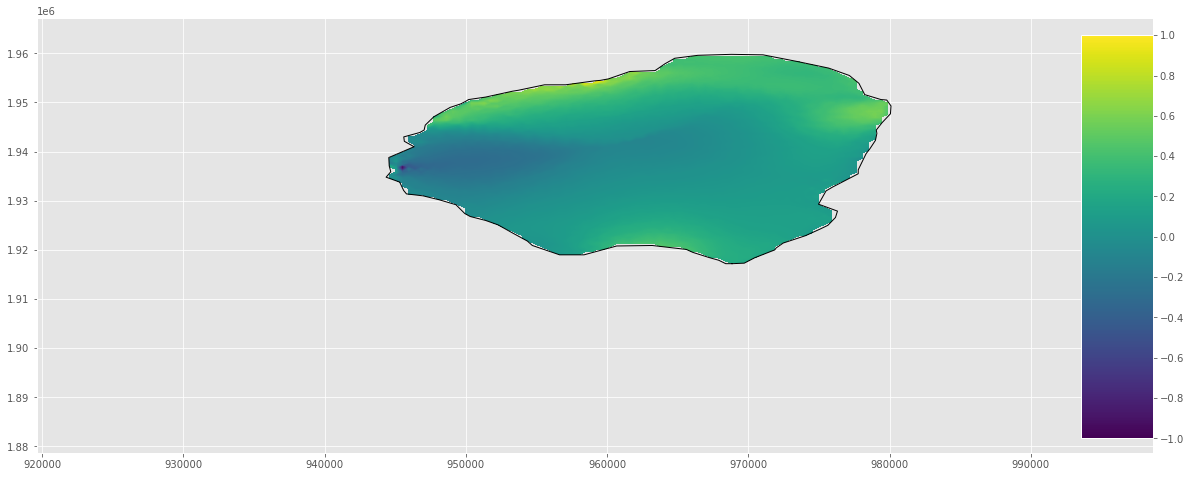

In [9]:
# Plot the dsdt adjustment

fig, ax = plt.subplots(1, 1, figsize=(20, 8))
#CS = ax.contourf(grid_x, grid_y, smb_new_dsdt_50)
CS = ax.contourf(grid_x, grid_y, smb_new_dsdt_10, levels=np.linspace(-1.0,1.0,500))

ax.plot(hull_pts[0], hull_pts[1], color='black', linewidth=1.0, label='Grounding line')
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
#fig.subplots_adjust(right=0.8)
fig.colorbar(CS, cax=cbar_ax, ticks=[-1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0])
#ax[0].legend(fontsize=20)
#fig.savefig('SMB.jpg', format='jpg', dpi=700, bbox_inches = "tight")





In [10]:
# Read in netcdf data

ds = nc.Dataset('/Users/clara.henry/Documents/Derwael/Code/Derwael_SMB.nc')
#smb_old = np.array(ds.variables['smb'][:], dtype=type(ds.variables))
smb_old = np.array(ds.variables['smb'][:])
X = np.array(ds.variables['x'][:])
Y = np.array(ds.variables['y'][:])
smb_old.shape

(178, 159)

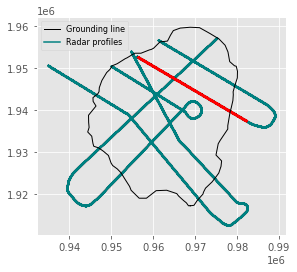

In [11]:

start=7000
end=12000

fig, ax = plt.subplots(1, 1)
#CS = ax.contourf(grid_x, grid_y, 0.9*smb_old, levels=np.linspace(0.0,1.0,101))

ax.plot(hull_pts[0], hull_pts[1], color='black', linewidth=1.0, label='Grounding line')
#ax.scatter(df["X"], df["Y"], c=0.9*df["smb"], vmin=0, vmax=1.0)
ax.scatter(df["X"], df["Y"], s=1.0, color='teal')
ax.scatter(df["X"][start:end], df["Y"][start:end], s=1.0, color='red', zorder=1)
ax.plot(df["X"][0], df["Y"][0], color='teal', label='Radar profiles')

ax.set_xlim(xmin=920000,xmax=1000000)
ax.set_ylim(1900000,1965000)
ax.ticklabel_format(axis='both', style='sci', scilimits=(6,6))
ax.axis('scaled')
#cbar = fig.colorbar(CS, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])

ax.legend(fontsize=8)
fig.savefig('RadarProfiles.jpg', format='jpg', dpi=700, bbox_inches = "tight")

/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_3083/164479866.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(CS, cax=cbar_ax, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])


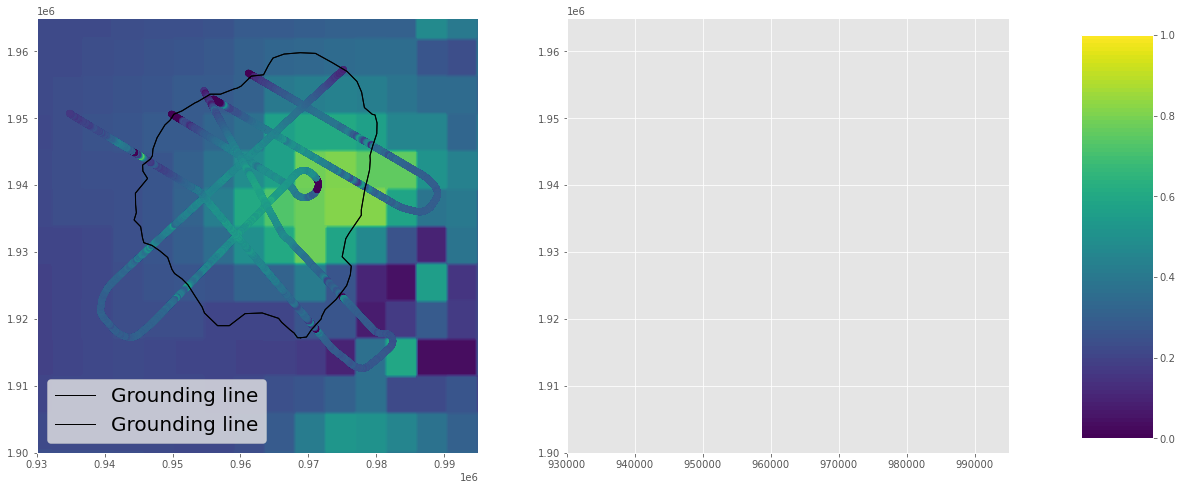

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
CS = ax[0].contourf(grid_x, grid_y, 0.9*smb_old, levels=np.linspace(0.0,1.0,101))

ax[0].plot(hull_pts[0], hull_pts[1], color='black', linewidth=1.0, label='Grounding line')
ax[0].plot(hull_pts[0], hull_pts[1], color='black', linewidth=1.0, label='Grounding line')
ax[0].scatter(df["X"], df["Y"], c=0.9*df["smb"], vmin=0, vmax=1.0)
#ax[0].scatter(df["X"], df["Y"], s=1.0, color='teal')
#ax[0].plot(df["X"][0], df["Y"][0], color='teal', label='Radar profiles')

ax[0].set_xlim(xmin=930000,xmax=995000)
ax[0].set_ylim(1900000,1965000)
ax[1].set_xlim(xmin=930000,xmax=995000)
ax[1].set_ylim(1900000,1965000)
ax[0].ticklabel_format(axis='both', style='sci', scilimits=(6,6))
#ax[0].axis('scaled')
#ax[1].axis('scaled')

#cbar = fig.colorbar(CS, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.subplots_adjust(right=0.8)
fig.colorbar(CS, cax=cbar_ax, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax[0].legend(fontsize=20)
fig.savefig('SMB.jpg', format='jpg', dpi=700, bbox_inches = "tight")

In [13]:
# Apply a Gaussian filter to the RACMO data

sigma_x = 5.0
sigma_y = 5.0

sigma = [sigma_x, sigma_y]
smoothed_old = sp.ndimage.gaussian_filter(smb_old, sigma)
#smoothed_old = sp.ndimage.gaussian_filter(smb_old, sigma, mode='constant')

In [14]:
# Substract the dsdt field from the old smb field

smb_adjusted_4 = smb_new - smb_new_dsdt_4
smb_adjusted_8 = smb_new - smb_new_dsdt_8
smb_adjusted_10 = smb_new - smb_new_dsdt_10
smb_adjusted_20 = smb_new - smb_new_dsdt_20
smb_adjusted_40 = smb_new - smb_new_dsdt_40
smb_adjusted_60 = smb_new - smb_new_dsdt_60
smb_adjusted_80 = smb_new - smb_new_dsdt_80
smb_adjusted_100 = smb_new - smb_new_dsdt_100

In [15]:
smb_new[np.isnan(smb_new)] = smoothed_old[np.isnan(smb_new)]
smb_adjusted_4[np.isnan(smb_adjusted_4)] = smoothed_old[np.isnan(smb_adjusted_4)]
smb_adjusted_8[np.isnan(smb_adjusted_8)] = smoothed_old[np.isnan(smb_adjusted_8)]
smb_adjusted_10[np.isnan(smb_adjusted_10)] = smoothed_old[np.isnan(smb_adjusted_10)]
smb_adjusted_20[np.isnan(smb_adjusted_20)] = smoothed_old[np.isnan(smb_adjusted_20)]
smb_adjusted_40[np.isnan(smb_adjusted_40)] = smoothed_old[np.isnan(smb_adjusted_40)]
smb_adjusted_60[np.isnan(smb_adjusted_60)] = smoothed_old[np.isnan(smb_adjusted_60)]
smb_adjusted_80[np.isnan(smb_adjusted_80)] = smoothed_old[np.isnan(smb_adjusted_80)]
smb_adjusted_100[np.isnan(smb_adjusted_100)] = smoothed_old[np.isnan(smb_adjusted_100)]


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_3083/1091367153.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS)


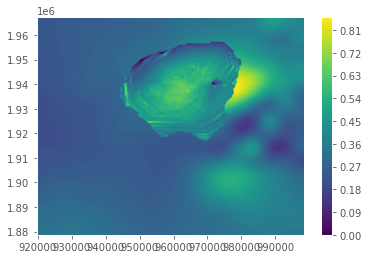

In [16]:
# different number of dimensions on data and dims: 2 vs 1

fig, ax = plt.subplots(1, 1)
CS = ax.contourf(grid_x, grid_y, smb_new, 100)
cbar = fig.colorbar(CS)

/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_3083/3946813028.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS)


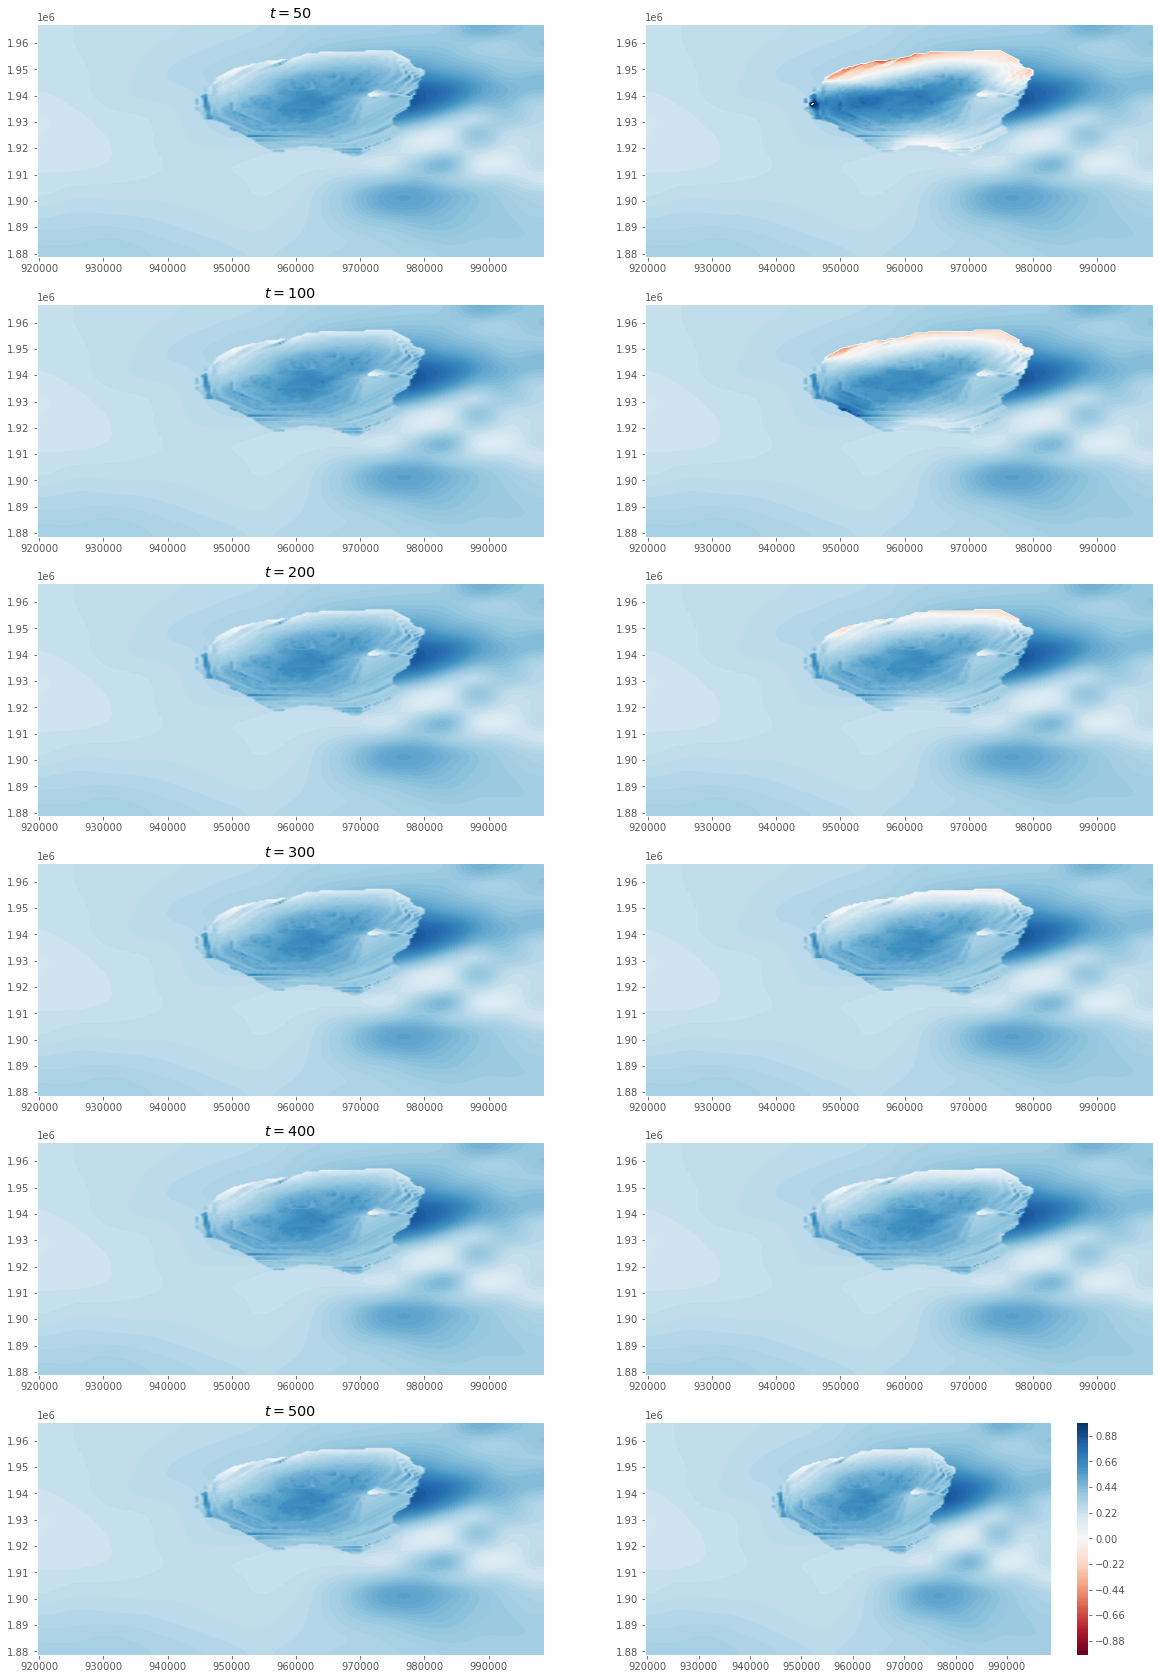

In [17]:
# Subtract the dsdt data from the previous smb version



fig, ax = plt.subplots(6, 2, figsize=(20, 30))
CS = ax[0][0].contourf(grid_x, grid_y, smb_new, 100, levels=np.linspace(-1.0,1.0,101), cmap='RdBu')
CS = ax[1][0].contourf(grid_x, grid_y, smb_new, 100, levels=np.linspace(-1.0,1.0,101), cmap='RdBu')
CS = ax[2][0].contourf(grid_x, grid_y, smb_new, 100, levels=np.linspace(-1.0,1.0,101), cmap='RdBu')
CS = ax[3][0].contourf(grid_x, grid_y, smb_new, 100, levels=np.linspace(-1.0,1.0,101), cmap='RdBu')
CS = ax[4][0].contourf(grid_x, grid_y, smb_new, 100, levels=np.linspace(-1.0,1.0,101), cmap='RdBu')
CS = ax[5][0].contourf(grid_x, grid_y, smb_new, 100, levels=np.linspace(-1.0,1.0,101), cmap='RdBu')
CS = ax[0][1].contourf(grid_x, grid_y, smb_adjusted_10, 100, levels=np.linspace(-1.0,1.0,101), cmap='RdBu')
CS = ax[1][1].contourf(grid_x, grid_y, smb_adjusted_20, 100, levels=np.linspace(-1.0,1.0,101), cmap='RdBu')
CS = ax[2][1].contourf(grid_x, grid_y, smb_adjusted_40, 100, levels=np.linspace(-1.0,1.0,101), cmap='RdBu')
CS = ax[3][1].contourf(grid_x, grid_y, smb_adjusted_60, 100, levels=np.linspace(-1.0,1.0,101), cmap='RdBu')
CS = ax[4][1].contourf(grid_x, grid_y, smb_adjusted_80, 100, levels=np.linspace(-1.0,1.0,101), cmap='RdBu')
CS = ax[5][1].contourf(grid_x, grid_y, smb_adjusted_100, 100, levels=np.linspace(-1.0,1.0,101), cmap='RdBu')

cbar = fig.colorbar(CS)

ax[0][0].title.set_text(r'$t=50$')
ax[1][0].title.set_text(r'$t=100$')
ax[2][0].title.set_text(r'$t=200$')
ax[3][0].title.set_text(r'$t=300$')
ax[4][0].title.set_text(r'$t=400$')
ax[5][0].title.set_text(r'$t=500$')



In [18]:
sigma_x = 3.0
sigma_y = 3.0

sigma = [sigma_x, sigma_y]
smoothed = sp.ndimage.gaussian_filter(smb_new, sigma, mode='constant')
smoothed_4 = sp.ndimage.gaussian_filter(smb_adjusted_4, sigma, mode='constant')
smoothed_8 = sp.ndimage.gaussian_filter(smb_adjusted_8, sigma, mode='constant')
smoothed_10 = sp.ndimage.gaussian_filter(smb_adjusted_10, sigma, mode='constant')
smoothed_20 = sp.ndimage.gaussian_filter(smb_adjusted_20, sigma, mode='constant')
smoothed_40 = sp.ndimage.gaussian_filter(smb_adjusted_40, sigma, mode='constant')
smoothed_60 = sp.ndimage.gaussian_filter(smb_adjusted_60, sigma, mode='constant')
smoothed_80 = sp.ndimage.gaussian_filter(smb_adjusted_80, sigma, mode='constant')
smoothed_100 = sp.ndimage.gaussian_filter(smb_adjusted_100, sigma, mode='constant')


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_3083/4253267977.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS)


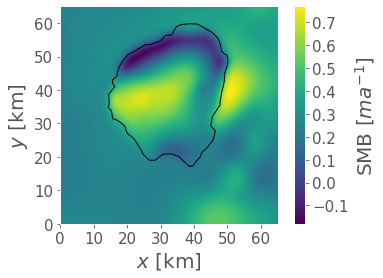

In [19]:
hull_pts2 = hull_pts

for i in range(len(hull_pts[0])):
    hull_pts2[0][i] = hull_pts2[0][i]/1000 - 930
    hull_pts2[1][i] = hull_pts2[1][i]/1000 - 1900

fig, ax = plt.subplots(1, 1)
CS = ax.contourf(grid_x/1000-930, grid_y/1000-1900, smoothed_10, 100)
#ax.scatter(df["X"]/1000-920, df["Y"]/1000-1880, s=1.0, color='black')
ax.plot(hull_pts2[0], hull_pts2[1], color='black', linewidth=1.0, label='Grounding line')

cbar = fig.colorbar(CS)
cbar.set_label(r'SMB [$ma^{-1}$]', size=20)
cbar.ax.tick_params(labelsize=15)
ax.set_xlabel(r'$x$ [km]', size=20)
ax.set_ylabel(r'$y$ [km]', size=20)
ax.tick_params(axis='both', labelsize=15)
ax.set_aspect('equal')
ax.set_xlim(xmin=930000/1000-930,xmax=995000/1000-930)
ax.set_ylim(1900000/1000-1900,1965000/1000-1900)
plt.xticks(np.arange(0, 70, 10.0))
fig.savefig('SMBdsdtadjustment.jpg', format='jpg', dpi=700, bbox_inches = "tight")

/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_3083/2563673672.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(CS, cax=cbar_ax, ticks=[-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0])


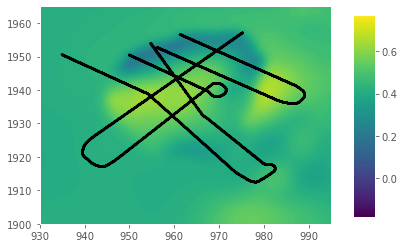

In [20]:
fig, ax = plt.subplots(1, 1)
#CS = ax[0].contourf(grid_x, grid_y, 0.9*smb_old, levels=np.linspace(-1.0,1.0,101))

#ax[0].plot(hull_pts[0], hull_pts[1], color='black', linewidth=1.0, label='Grounding line')
#ax.plot(hull_pts[0], hull_pts[1], color='black', linewidth=1.0, label='Grounding line')
#ax[0].scatter(df["X"], df["Y"], c=0.9*df["smb"], vmin=0, vmax=1.0)

#ax[0].plot(df["X"][0], df["Y"][0], color='teal', label='Radar profiles')

ax.contourf(grid_x/1000, grid_y/1000, smoothed_10, 100, levels=np.linspace(-1.0,1.0,101))
ax.scatter(df["X"]/1000, df["Y"]/1000, s=1.0, color='black')

#ax[0].set_xlim(xmin=930000,xmax=995000)
#ax[0].set_ylim(1900000,1965000)
ax.set_xlim(xmin=930000/1000,xmax=995000/1000)
ax.set_ylim(1900000/1000,1965000/1000)
#ax[0].ticklabel_format(axis='both', style='sci', scilimits=(6,6))
#ax[0].axis('scaled')
#ax[1].axis('scaled')

#cbar = fig.colorbar(CS, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.subplots_adjust(right=0.8)
fig.colorbar(CS, cax=cbar_ax, ticks=[-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0])
#ax[0].legend(fontsize=20)
fig.savefig('SMB.jpg', format='jpg', dpi=700, bbox_inches = "tight")

In [21]:
hull_pts[0]

array('d', [38.84000000000003, 38.389999999999986, 37.889999999999986, 37.26999999999998, 36.059999999999945, 35.60000000000002, 33.190000000000055, 30.66999999999996, 28.360000000000014, 26.629999999999995, 24.700000000000045, 24.350000000000023, 23.33000000000004, 22.269999999999982, 21.389999999999986, 20.299999999999955, 19.91999999999996, 19.289999999999964, 18.110000000000014, 16.970000000000027, 15.789999999999964, 15.590000000000032, 15.309999999999945, 14.350000000000023, 14.67999999999995, 14.57000000000005, 14.539999999999964, 16.33000000000004, 15.639999999999986, 15.600000000000023, 16.74000000000001, 17.039999999999964, 17.120000000000005, 17.730000000000018, 18.879999999999995, 19.620000000000005, 19.960000000000036, 20.190000000000055, 21.389999999999986, 23.299999999999955, 23.730000000000018, 25.559999999999945, 27.059999999999945, 29.090000000000032, 29.50999999999999, 30.08000000000004, 31.590000000000032, 33.389999999999986, 34.10000000000002, 34.77999999999997, 36

In [22]:
# Old code

smoothedT = smoothed.transpose()
smoothedT_4 = smoothed_4.transpose()
smoothedT_8 = smoothed_8.transpose()
smoothedT_10 = smoothed_10.transpose()
smoothedT_20 = smoothed_20.transpose()
smoothedT_40 = smoothed_40.transpose()
smoothedT_60 = smoothed_60.transpose()
smoothedT_80 = smoothed_80.transpose()
smoothedT_100 = smoothed_100.transpose()

da = xr.DataArray(
    data=smoothedT,
    dims=['y', 'x'],
    coords=dict(
        x=grid_x[:,0],
        y=grid_y[0,:]
    )
)

da_4 = xr.DataArray(
    data=smoothedT_4,
    dims=['y', 'x'],
    coords=dict(
        x=grid_x[:,0],
        y=grid_y[0,:]
    )
)
da_8 = xr.DataArray(
    data=smoothedT_8,
    dims=['y', 'x'],
    coords=dict(
        x=grid_x[:,0],
        y=grid_y[0,:]
    )
)
da_10 = xr.DataArray(
    data=smoothedT_10,
    dims=['y', 'x'],
    coords=dict(
        x=grid_x[:,0],
        y=grid_y[0,:]
    )
)
da_20 = xr.DataArray(
    data=smoothedT_20,
    dims=['y', 'x'],
    coords=dict(
        x=grid_x[:,0],
        y=grid_y[0,:]
    )
)

da_40 = xr.DataArray(
    data=smoothedT_40,
    dims=['y', 'x'],
    coords=dict(
        x=grid_x[:,0],
        y=grid_y[0,:]
    )
)

da_60 = xr.DataArray(
    data=smoothedT_60,
    dims=['y', 'x'],
    coords=dict(
        x=grid_x[:,0],
        y=grid_y[0,:]
    )
)

da_80 = xr.DataArray(
    data=smoothedT_80,
    dims=['y', 'x'],
    coords=dict(
        x=grid_x[:,0],
        y=grid_y[0,:]
    )
)

da_100 = xr.DataArray(
    data=smoothedT_100,
    dims=['y', 'x'],
    coords=dict(
        x=grid_x[:,0],
        y=grid_y[0,:]
    )
)

da.to_netcdf('Combined_SMB_Smoothed.nc')
da_4.to_netcdf('Combined_SMB_Smoothed_year_20.nc') 
da_8.to_netcdf('Combined_SMB_Smoothed_year_40.nc')
da_10.to_netcdf('Combined_SMB_Smoothed_year_50.nc')
da_20.to_netcdf('Combined_SMB_Smoothed_year_100.nc')
da_40.to_netcdf('Combined_SMB_Smoothed_year_200.nc')
da_60.to_netcdf('Combined_SMB_Smoothed_year_300.nc')
da_80.to_netcdf('Combined_SMB_Smoothed_year_400.nc')
da_100.to_netcdf('Combined_SMB_Smoothed_year_500.nc')
da.close()


In [25]:
da_100

<xarray.DataArray (y: 159, x: 178)>
array([[0.10519215, 0.12854622, 0.14831158, ..., 0.15775803, 0.13673017,
        0.1118866 ],
       [0.12839216, 0.15689557, 0.18101789, ..., 0.19295005, 0.16723127,
        0.13684565],
       [0.14789592, 0.18072718, 0.20851045, ..., 0.22287149, 0.19316419,
        0.15806644],
       ...,
       [0.10779744, 0.13175218, 0.15204406, ..., 0.24645847, 0.21296506,
        0.17387659],
       [0.09342368, 0.1141844 , 0.13177073, ..., 0.21337426, 0.18432111,
        0.15045549],
       [0.07644529, 0.09343313, 0.10782352, ..., 0.17445941, 0.15067066,
        0.12296648]])
Coordinates:
  * x        (x) float64 9.196e+05 9.201e+05 9.205e+05 ... 9.982e+05 9.986e+05
  * y        (y) float64 1.879e+06 1.879e+06 1.88e+06 ... 1.967e+06 1.967e+06